## Project 7
### Storage Location Allocation
Prepared for: ExxpertSCM Thoughtware Training Pvt Ltd.


Guided by:  Mr. Pattabhi Raman


In [ ]:
import numpy as np
import pandas as pd
import io
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data = pd.read_csv('E_commerce_Portugal.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536990,21992,VINTAGE PAISLEY STATIONERY SET,6,12-03-2010 15:14,2.95,12793.0,Portugal
1,536990,22383,LUNCH BAG SUKI DESIGN,10,12-03-2010 15:14,1.65,12793.0,Portugal
2,536990,20728,LUNCH BAG CARS BLUE,14,12-03-2010 15:14,1.65,12793.0,Portugal
3,536990,20658,RED RETROSPOT LUGGAGE TAG,12,12-03-2010 15:14,1.25,12793.0,Portugal
4,536990,20669,RED HEART LUGGAGE TAG,12,12-03-2010 15:14,1.25,12793.0,Portugal
...,...,...,...,...,...,...,...,...
1514,581182,22366,DOORMAT AIRMAIL,2,12-07-2011 15:56,8.25,12783.0,Portugal
1515,581182,22690,DOORMAT HOME SWEET HOME BLUE,2,12-07-2011 15:56,8.25,12783.0,Portugal
1516,581182,22692,DOORMAT WELCOME TO OUR HOME,2,12-07-2011 15:56,8.25,12783.0,Portugal
1517,581182,POST,POSTAGE,4,12-07-2011 15:56,28.00,12783.0,Portugal


In [ ]:
data.select_dtypes(include= ['object']).describe()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,1519,1519,1519,1519,1519
unique,71,706,714,71,1
top,569866,POST,POSTAGE,10-06-2011 14:50,Portugal
freq,182,30,30,182,1519


In [ ]:
# Exploring the columns of the data
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536990,21992,VINTAGE PAISLEY STATIONERY SET,6,12-03-2010 15:14,2.95,12793.0,Portugal
1,536990,22383,LUNCH BAG SUKI DESIGN,10,12-03-2010 15:14,1.65,12793.0,Portugal
2,536990,20728,LUNCH BAG CARS BLUE,14,12-03-2010 15:14,1.65,12793.0,Portugal
3,536990,20658,RED RETROSPOT LUGGAGE TAG,12,12-03-2010 15:14,1.25,12793.0,Portugal
4,536990,20669,RED HEART LUGGAGE TAG,12,12-03-2010 15:14,1.25,12793.0,Portugal
...,...,...,...,...,...,...,...,...
1514,581182,22366,DOORMAT AIRMAIL,2,12-07-2011 15:56,8.25,12783.0,Portugal
1515,581182,22690,DOORMAT HOME SWEET HOME BLUE,2,12-07-2011 15:56,8.25,12783.0,Portugal
1516,581182,22692,DOORMAT WELCOME TO OUR HOME,2,12-07-2011 15:56,8.25,12783.0,Portugal
1517,581182,POST,POSTAGE,4,12-07-2011 15:56,28.00,12783.0,Portugal


In [ ]:
data.Quantity.nunique()

32

In [ ]:
data = data[data['Quantity'] >= 0]

In [ ]:
data.shape

(1501, 8)

In [ ]:
data.nunique()

InvoiceNo       58
StockCode      706
Description    713
Quantity        28
InvoiceDate     58
UnitPrice       64
CustomerID      19
Country          1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 0 to 1518
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1501 non-null   object 
 1   StockCode    1501 non-null   object 
 2   Description  1501 non-null   object 
 3   Quantity     1501 non-null   int64  
 4   InvoiceDate  1501 non-null   object 
 5   UnitPrice    1501 non-null   float64
 6   CustomerID   1462 non-null   float64
 7   Country      1501 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 105.5+ KB


In [ ]:
data.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     39
Country         0
dtype: int64

In [ ]:
data = data.drop(['CustomerID'],axis = 1)

In [ ]:
data = data.dropna(axis = 0,how = 'any')

In [ ]:
data.shape

(1501, 7)

In [ ]:
data.duplicated().sum()

9

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:

# Dropping all transactions which were done on credit
data = data[~data['InvoiceNo'].str.contains('C')]


In [ ]:
data.shape

(1492, 7)

In [ ]:
data['Quantity'].unique()

array([  6,  10,  14,  12,   1,   2,   9,   4,   3,   8,   5,  24,  20,
        40,  16,  36,  48,  72,  60, 120,  32,  18,  25,  30,  15,  50,
        96,   7])

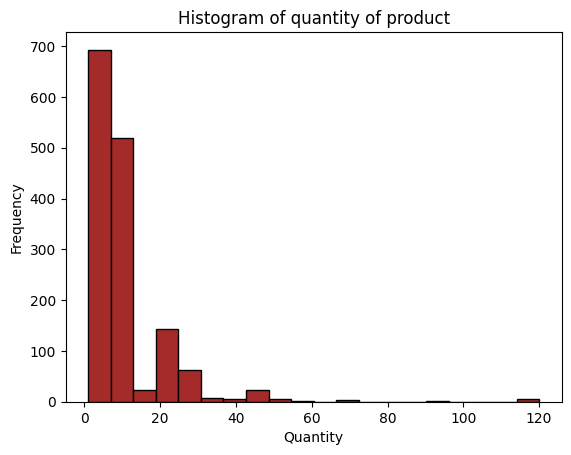

In [ ]:
plt.hist(data['Quantity'], bins=20, color='brown', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of quantity of product')
plt.show()

Text(0.5, 1.0, 'products that is brought more often')

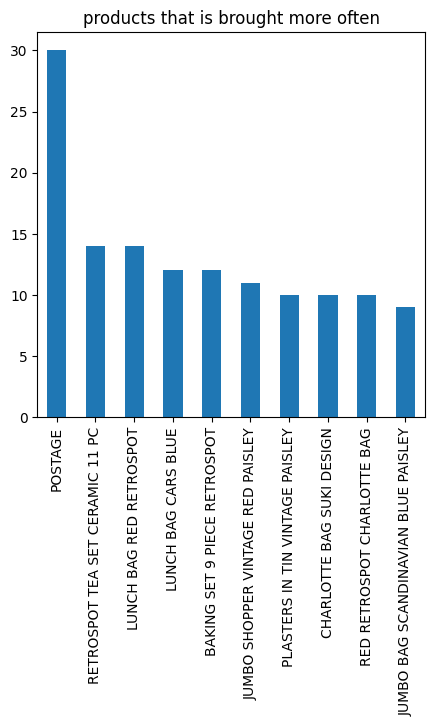

In [ ]:
plt.figure(figsize=(5,5))
data['Description'].value_counts().nlargest(10).plot(kind='bar')
plt.title("products that is brought more often")

In [ ]:
grouped_df = data.groupby('Description').agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum'
}).reset_index()
grouped_df = grouped_df.merge(data[['Description', 'InvoiceDate']], on='Description')

In [ ]:
grouped_df

,Description,UnitPrice,Quantity,InvoiceDate
0,10 COLOUR SPACEBOY PEN,0.85,24,01-09-2011 15:56
1,12 PENCIL SMALL TUBE WOODLAND,0.65,5,05-12-2011 19:01
2,12 PENCIL SMALL TUBE WOODLAND,0.65,5,10-06-2011 14:50
3,12 PENCILS SMALL TUBE RED RETROSPOT,0.65,7,05-12-2011 19:01
4,12 PENCILS SMALL TUBE RED RETROSPOT,0.65,7,10-06-2011 14:50
...,...,...,...,...
1487,WRAP RED VINTAGE DOILY,0.42,50,10/13/2011 11:50
1488,WRAP SUKI AND FRIENDS,0.42,50,8/15/2011 10:22
1489,YOU'RE CONFUSING ME METAL SIGN,1.69,12,12-02-2011 10:23
1490,ZINC FOLKART SLEIGH BELLS,1.69,12,10-11-2011 09:19


In [ ]:
grouped_df['TotalValue'] = grouped_df['Quantity'] * grouped_df['UnitPrice']
grouped_df = grouped_df.sort_values(by='TotalValue', ascending=False)
grouped_df['CumulativeValue'] = grouped_df['TotalValue'].cumsum()
grouped_df['PercentageContribution'] = (grouped_df['CumulativeValue'] / grouped_df['TotalValue'].sum()) * 100

In [ ]:
def categorize(value):
    if value >= 99:
        return 'A'
    elif value >= 90 <=99:
        return 'B'
    else:
        return 'C'
grouped_df['Category'] = grouped_df['PercentageContribution'].apply(categorize)
grouped_df

,Description,UnitPrice,Quantity,InvoiceDate,TotalValue,CumulativeValue,PercentageContribution,Category
717,Manual,603.241429,8,10/17/2011 11:08,4825.931429,4825.931429,2.175452,C
718,Manual,603.241429,8,10/17/2011 11:11,4825.931429,9651.862857,4.350904,C
715,Manual,603.241429,8,5/23/2011 14:58,4825.931429,14477.794286,6.526356,C
714,Manual,603.241429,8,5/23/2011 14:46,4825.931429,19303.725714,8.701808,C
713,Manual,603.241429,8,5/23/2011 11:26,4825.931429,24129.657143,10.877260,C
...,...,...,...,...,...,...,...,...
448,HERB MARKER PARSLEY,0.650000,1,05-12-2011 19:01,0.650000,221833.270000,99.998860,A
449,HERB MARKER ROSEMARY,0.650000,1,05-12-2011 19:01,0.650000,221833.920000,99.999153,A
450,HERB MARKER THYME,0.650000,1,05-12-2011 19:01,0.650000,221834.570000,99.999446,A
437,HEART DECORATION PAINTED ZINC,0.650000,1,10-06-2011 14:50,0.650000,221835.220000,99.999739,A


In [ ]:
grouped_df['Category'].value_counts()

C    614
B    588
A    290
Name: Category, dtype: int64

In [ ]:
grouped_df.reset_index(drop=False, inplace=True)

df = grouped_df[['InvoiceDate','Description','Category','Quantity']]
df

,InvoiceDate,Description,Category,Quantity
0,10/17/2011 11:08,Manual,C,8
1,10/17/2011 11:11,Manual,C,8
2,5/23/2011 14:58,Manual,C,8
3,5/23/2011 14:46,Manual,C,8
4,5/23/2011 11:26,Manual,C,8
...,...,...,...,...
1487,05-12-2011 19:01,HERB MARKER PARSLEY,A,1
1488,05-12-2011 19:01,HERB MARKER ROSEMARY,A,1
1489,05-12-2011 19:01,HERB MARKER THYME,A,1
1490,10-06-2011 14:50,HEART DECORATION PAINTED ZINC,A,1


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
unique_products = df['Description'].unique()
product_codes = ['G' + str(i + 1) for i in range(len(unique_products))]

# Step 4: Create a mapping dictionary for Description to ProductCode
product_code_mapping = dict(zip(unique_products, product_codes))

# Step 5: Add the 'ProductCode' column to the DataFrame based on the mapping
df['ProductCode'] = df['Description'].map(product_code_mapping)
df

,InvoiceDate,Description,Category,Quantity,ProductCode
0,2011-10-17 11:08:00,Manual,C,8,G1
1,2011-10-17 11:11:00,Manual,C,8,G1
2,2011-05-23 14:58:00,Manual,C,8,G1
3,2011-05-23 14:46:00,Manual,C,8,G1
4,2011-05-23 11:26:00,Manual,C,8,G1
...,...,...,...,...,...
1487,2011-05-12 19:01:00,HERB MARKER PARSLEY,A,1,G709
1488,2011-05-12 19:01:00,HERB MARKER ROSEMARY,A,1,G710
1489,2011-05-12 19:01:00,HERB MARKER THYME,A,1,G711
1490,2011-10-06 14:50:00,HEART DECORATION PAINTED ZINC,A,1,G712


In [ ]:
df.ProductCode.nunique()

713

In [ ]:
basket_df = (df.groupby(['InvoiceDate','ProductCode'])
                   ['Quantity'].sum()
                   .unstack().reset_index().fillna(0)
                   .set_index('InvoiceDate'))
basket_df

ProductCode,G1,G10,G100,G101,G102,G103,G104,G105,G106,G107,...,G90,G91,G92,G93,G94,G95,G96,G97,G98,G99
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-03 15:14:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
2010-12-06 10:27:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-08 13:53:00,0.0,0.0,20.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-09 10:55:00,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-10 13:48:00,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-17 11:30:00,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-09 12:12:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-09 15:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-18 09:50:00,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,60.0,0.0,0.0,30.0,72.0,0.0,0.0,0.0


In [ ]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

# Encoding the datasets
basket = basket_df.applymap(hot_encode)
basket_df = basket


In [ ]:
basket_df

ProductCode,G1,G10,G100,G101,G102,G103,G104,G105,G106,G107,...,G90,G91,G92,G93,G94,G95,G96,G97,G98,G99
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-03 15:14:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2010-12-06 10:27:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-08 13:53:00,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 10:55:00,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2010-12-10 13:48:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-17 11:30:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-09 12:12:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-09 15:56:00,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-18 09:50:00,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
# Building the model
frq_items = apriori(basket_df, min_support = 0.06, use_colnames = True)
frq_items['num_items'] = frq_items['itemsets'].apply(lambda x: len(x))

# Display the frequent itemsets with the number of items
frq_items[['support','itemsets', 'num_items']]


,support,itemsets,num_items
0,0.120690,(G1),1
1,0.155172,(G10),1
2,0.068966,(G100),1
3,0.086207,(G101),1
4,0.120690,(G105),1
...,...,...,...
1128,0.068966,"(G20, G5, G10, G9, G8, G44, G4)",7
1129,0.068966,"(G64, G20, G9, G8, G40, G4, G11)",7
1130,0.068966,"(G20, G5, G9, G8, G44, G4, G11)",7
1131,0.068966,"(G64, G20, G10, G9, G8, G40, G4, G11)",8


In [ ]:
frq_items.num_items.value_counts()

4    273
3    264
2    198
5    195
1     96
6     85
7     20
8      2
Name: num_items, dtype: int64

In [ ]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="confidence", min_threshold = 0.5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
98,(G155),(G47),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf,1.000000
99,(G47),(G155),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf,1.000000
232,(G64),(G40),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf,1.000000
233,(G40),(G64),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf,1.000000
509,"(G64, G10)",(G40),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
245,(G54),(G5),0.172414,0.241379,0.086207,0.5,2.071429,0.044590,1.517241,0.625000
1280,"(G9, G5)",(G3),0.137931,0.241379,0.068966,0.5,2.071429,0.035672,1.517241,0.600000
117,(G18),(G2),0.137931,0.517241,0.068966,0.5,0.966667,-0.002378,0.965517,-0.038462
138,(G3),(G2),0.241379,0.517241,0.120690,0.5,0.966667,-0.004162,0.965517,-0.043478


In [ ]:
merged_df = frq_items.merge(rules, left_on='itemsets', right_on='antecedents')
merged_df

,support_x,itemsets,num_items,antecedents,consequents,antecedent support,consequent support,support_y,confidence,lift,leverage,conviction,zhangs_metric
0,0.155172,(G10),1,(G10),(G4),0.155172,0.189655,0.155172,1.000000,5.272727,0.125743,inf,0.959184
1,0.155172,(G10),1,(G10),"(G4, G5)",0.155172,0.137931,0.137931,0.888889,6.444444,0.116528,7.758621,1.000000
2,0.155172,(G10),1,(G10),"(G4, G8)",0.155172,0.137931,0.137931,0.888889,6.444444,0.116528,7.758621,1.000000
3,0.155172,(G10),1,(G10),(G8),0.155172,0.155172,0.137931,0.888889,5.728395,0.113853,7.603448,0.977041
4,0.155172,(G10),1,(G10),(G5),0.155172,0.241379,0.137931,0.888889,3.682540,0.100476,6.827586,0.862245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17649,0.068966,"(G5, G10, G9, G8, G44, G4, G11)",7,"(G5, G10, G8, G4, G44, G9, G11)",(G20),0.068966,0.137931,0.068966,1.000000,7.250000,0.059453,inf,0.925926
17650,0.068966,"(G64, G20, G10, G9, G8, G40, G4)",7,"(G64, G20, G10, G8, G4, G40, G9)",(G11),0.068966,0.137931,0.068966,1.000000,7.250000,0.059453,inf,0.925926
17651,0.068966,"(G20, G5, G10, G9, G8, G44, G4)",7,"(G20, G5, G10, G8, G4, G44, G9)",(G11),0.068966,0.137931,0.068966,1.000000,7.250000,0.059453,inf,0.925926
17652,0.068966,"(G64, G20, G9, G8, G40, G4, G11)",7,"(G64, G20, G8, G4, G40, G9, G11)",(G10),0.068966,0.155172,0.068966,1.000000,6.444444,0.058264,inf,0.907407


In [ ]:
final_df = merged_df[['num_items','antecedents','antecedent support',
                      'consequents', 'consequent support',
                      'support_y', 'confidence', 'lift', 'leverage', 'conviction']]
final_df.rename(columns={'support_y': 'rule_support'},
                inplace=True)

In [ ]:
result_df = final_df[final_df['num_items']==1]
result_df

,num_items,antecedents,antecedent support,consequents,consequent support,rule_support,confidence,lift,leverage,conviction
0,1,(G10),0.155172,(G4),0.189655,0.155172,1.000000,5.272727,0.125743,inf
1,1,(G10),0.155172,"(G4, G5)",0.137931,0.137931,0.888889,6.444444,0.116528,7.758621
2,1,(G10),0.155172,"(G4, G8)",0.137931,0.137931,0.888889,6.444444,0.116528,7.758621
3,1,(G10),0.155172,(G8),0.155172,0.137931,0.888889,5.728395,0.113853,7.603448
4,1,(G10),0.155172,(G5),0.241379,0.137931,0.888889,3.682540,0.100476,6.827586
...,...,...,...,...,...,...,...,...,...,...
1805,1,(G9),0.206897,"(G4, G5)",0.137931,0.103448,0.500000,3.625000,0.074911,1.724138
1806,1,(G9),0.206897,"(G4, G8)",0.137931,0.103448,0.500000,3.625000,0.074911,1.724138
1807,1,(G9),0.206897,"(G10, G4, G5)",0.137931,0.103448,0.500000,3.625000,0.074911,1.724138
1808,1,(G9),0.206897,"(G10, G4, G8)",0.137931,0.103448,0.500000,3.625000,0.074911,1.724138


In [ ]:
total_transactions = basket_df.shape[0]

In [ ]:
# Calculate the support as whole numbers
result_df['support'] = (result_df['rule_support'] * total_transactions).round(0).astype(int)

# Create the final DataFrame with the required columns
final_dff = result_df[['antecedents', 'consequents', 'support', 'confidence',
                      'antecedent support', 'consequent support']]

# Calculate the frequency of antecedents and consequents occurrence
antecedent_count = result_df['antecedents'].value_counts()
consequent_count = result_df['consequents'].value_counts()

# Add the frequency of X and Y occurrence columns to the final DataFrame
final_dff['Frequnecy of X occurrence'] = final_dff['antecedents'].map(antecedent_count)
final_dff['Frequnecy of Y occurrence'] = final_dff['consequents'].map(consequent_count)

# Calculate the frequency of Y occurrence as a percentage
final_dff['frequencty of Y occurance(%)'] = (final_dff['Frequnecy of Y occurrence'] / total_transactions) * 100

# Calculate the higher degree of confidence as a percentage
final_dff['higher degree of confidenec(%)'] = final_dff['confidence'] * 100

# Rename the columns for better readability
final_dff.rename(columns={'antecedent support': 'support P(X)',
                         'consequent support': 'support P(Y)',
                         'confidence': 'confidence P(X|Y)%'},
                inplace=True)

# Sort the final DataFrame by support in descending order
final_dff = final_dff.sort_values(by='support', ascending=False)

# Display the final DataFrame
final_dff

,antecedents,consequents,support,confidence P(X|Y)%,support P(X),support P(Y),Frequnecy of X occurrence,Frequnecy of Y occurrence,frequencty of Y occurance(%),higher degree of confidenec(%)
0,(G10),(G4),9,1.000000,0.155172,0.189655,73,17,29.310345,100.000000
1548,(G6),(G3),9,0.750000,0.206897,0.241379,2,18,31.034483,75.000000
1094,(G3),(G6),9,0.642857,0.241379,0.206897,2,5,8.620690,64.285714
1208,(G4),(G10),9,0.818182,0.189655,0.155172,25,16,27.586207,81.818182
1211,(G4),(G8),8,0.727273,0.189655,0.155172,25,16,27.586207,72.727273
...,...,...,...,...,...,...,...,...,...,...
706,(G18),"(G54, G52)",4,0.500000,0.137931,0.120690,93,3,5.172414,50.000000
705,(G18),"(G11, G5)",4,0.500000,0.137931,0.120690,93,8,13.793103,50.000000
704,(G18),"(G4, G11)",4,0.500000,0.137931,0.120690,93,10,17.241379,50.000000
703,(G18),"(G10, G9)",4,0.500000,0.137931,0.120690,93,11,18.965517,50.000000


In [ ]:
final_dff.describe()

,support,confidence P(X|Y)%,support P(X),support P(Y),Frequnecy of X occurrence,Frequnecy of Y occurrence,frequencty of Y occurance(%),higher degree of confidenec(%)
count,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000
mean,4.364641,0.648550,0.123833,0.101448,162.466298,5.469613,9.430368,64.854956
std,0.803302,0.186892,0.033358,0.053105,118.411572,4.737138,8.167480,18.689181
min,4.000000,0.500000,0.068966,0.068966,1.000000,1.000000,1.724138,50.000000
25%,4.000000,0.500000,0.086207,0.068966,71.000000,2.000000,3.448276,50.000000
50%,4.000000,0.555556,0.137931,0.086207,127.000000,4.000000,6.896552,55.555556
75%,4.000000,0.800000,0.137931,0.120690,311.000000,8.000000,13.793103,80.000000
max,9.000000,1.000000,0.241379,0.517241,319.000000,20.000000,34.482759,100.000000


In [ ]:
# Define the percentage ranges for each category
category_ranges = {
    'A': (0, 0.15),
    'B': (0.15, 0.15 + 0.35),
    'C': (0.15 + 0.35, 1)
}

# Calculate the number of rows for each category based on the percentage ranges
total_rows = len(final_dff)
category_counts = {
    category: int(total_rows * (upper - lower))
    for category, (lower, upper) in category_ranges.items()
}

# Sort the dataframe by support in descending order
final_dff = final_dff.sort_values(by='support', ascending=False)

# Divide the dataframe into categories
categories = ['A', 'B', 'C']
category_dfs = {}
start_idx = 0

# Now the three dataframes have an additional 'category' column


for category in categories:
    end_idx = start_idx + category_counts[category]
    category_dfs[category] = final_dff.iloc[start_idx:end_idx]
    start_idx = end_idx

# Now you have separate dataframes for categories A, B, and C
category_a_df = category_dfs['A']
category_b_df = category_dfs['B']
category_c_df = category_dfs['C']

In [ ]:
category_a_df = category_a_df[['antecedents','consequents','support']]
category_a_df

,antecedents,consequents,support
0,(G10),(G4),9
1094,(G3),(G6),9
1208,(G4),(G10),9
1548,(G6),(G3),9
2,(G10),"(G4, G8)",8
...,...,...,...
636,(G18),"(G10, G4, G8)",5
635,(G18),"(G10, G4, G5)",5
633,(G18),"(G4, G5)",5
127,(G11),"(G4, G9, G8)",5


In [ ]:
category_b_df = category_b_df[['antecedents','consequents','support']]
category_b_df

,antecedents,consequents,support
121,(G11),"(G10, G4, G20)",5
630,(G18),"(G10, G4, G5, G8)",5
126,(G11),"(G4, G9, G5)",5
627,(G18),"(G5, G8)",5
739,(G20),"(G10, G11, G8)",5
...,...,...,...
1333,(G40),"(G10, G20, G8)",4
1363,(G42),(G46),4
1332,(G40),"(G10, G4, G20)",4
1342,(G40),"(G10, G4, G9, G8)",4


In [ ]:
category_c_df = category_c_df[['antecedents','consequents','support']]
category_c_df

,antecedents,consequents,support
1330,(G40),"(G10, G11, G8)",4
1329,(G40),"(G9, G8)",4
1326,(G40),"(G4, G20)",4
1325,(G40),"(G11, G8)",4
1324,(G40),"(G10, G20)",4
...,...,...,...
705,(G18),"(G11, G5)",4
704,(G18),"(G4, G11)",4
703,(G18),"(G10, G9)",4
711,(G18),(G14),4


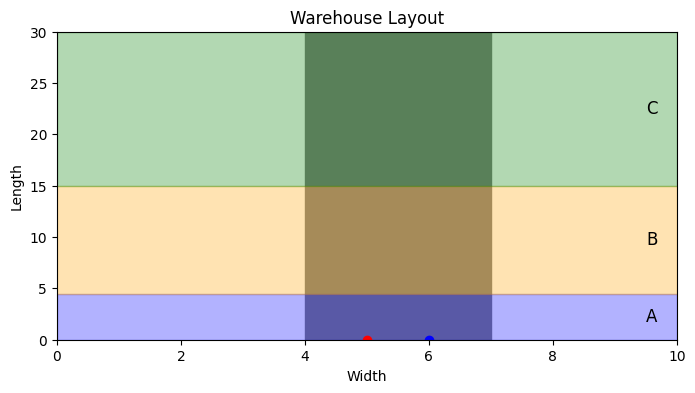

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Sketch the Layout
warehouse_width = 10
warehouse_length = 30
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, warehouse_width)
ax.set_ylim(0, warehouse_length)

# Step 7: Define Aisles and Pathways
aisle_width = 1
ax.add_patch(plt.Rectangle((6, 0), aisle_width, warehouse_length, color='gray'))

# Central Pathway
central_pathway_width = 2  # Set the pathway width to cover from 4 to 6 on x-axis
central_pathway_start = 4
ax.add_patch(plt.Rectangle((central_pathway_start, 0), central_pathway_width, warehouse_length, color='gray'))

# Step 2: Determine Input and Output Points
input_point = (central_pathway_start + central_pathway_width / 1, 0)
output_point = (central_pathway_start + central_pathway_width / 2, 0)

ax.plot(*input_point, 'bo', label='Input Point')
ax.plot(*output_point, 'ro', label='Output Point')


# Calculate the number of rows for each category based on dataframe lengths
category_a_rows = len(category_a_df)
category_b_rows = len(category_b_df)
category_c_rows = len(category_c_df)

# Calculate the heights for each category
total_rows = category_a_rows + category_b_rows + category_c_rows
category_a_height = (category_a_rows / total_rows) * warehouse_length
category_b_height = (category_b_rows / total_rows) * warehouse_length
category_c_height = (category_c_rows / total_rows) * warehouse_length

ax.add_patch(plt.Rectangle((0, 0), warehouse_width, category_a_height, color='blue', alpha=0.3, label='Category A'))
ax.add_patch(plt.Rectangle((0, category_a_height), warehouse_width, category_b_height, color='orange', alpha=0.3, label='Category B'))
ax.add_patch(plt.Rectangle((0, category_a_height + category_b_height), warehouse_width, category_c_height, color='green', alpha=0.3, label='Category C'))

# Add labels
ax.text(warehouse_width - 0.5, category_a_height / 2, 'A', fontsize=12, verticalalignment='center')
ax.text(warehouse_width - 0.5, category_a_height + category_b_height / 2, 'B', fontsize=12, verticalalignment='center')
ax.text(warehouse_width - 0.5, category_a_height + category_b_height + category_c_height / 2, 'C', fontsize=12, verticalalignment='center')


plt.xlabel('Width')
plt.ylabel('Length')
plt.title('Warehouse Layout')
plt.show()
